
# Tyre strategies during a race

Plot all drivers' tyre strategies during a race.


In [2]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

Load the race session



In [3]:
session = fastf1.get_session(2024, "Jeddah", 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (101.13 MB) C:\Users\arkan\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31',

Get the list of driver numbers



In [4]:
drivers = session.drivers
print(drivers)

['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


Convert the driver numbers to three letter abbreviations



In [5]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'PER', 'LEC', 'PIA', 'ALO', 'RUS', 'BEA', 'NOR', 'HAM', 'HUL', 'ALB', 'MAG', 'OCO', 'TSU', 'SAR', 'RIC', 'BOT', 'ZHO', 'STR', 'GAS']


We need to find the stint length and compound used
for every stint by every driver.
We do this by first grouping the laps by the driver,
the stint number, and the compound.
And then counting the number of laps in each group.



In [6]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

The number in the LapNumber column now stands for the number of observations
in that group aka the stint length.



In [7]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM            7
1     ALB    2.0     HARD           43
2     ALO    1.0   MEDIUM            7
3     ALO    2.0     HARD           43
4     BEA    1.0     SOFT            7
5     BEA    2.0     HARD           43
6     BOT    1.0     SOFT            7
7     BOT    2.0     HARD           28
8     BOT    3.0     SOFT           14
9     GAS    1.0   MEDIUM            1
10    HAM    1.0   MEDIUM           36
11    HAM    2.0     SOFT           14
12    HUL    1.0   MEDIUM           33
13    HUL    2.0     HARD           17
14    LEC    1.0   MEDIUM            7
15    LEC    2.0     HARD           43
16    MAG    1.0   MEDIUM            7
17    MAG    2.0     HARD           43
18    NOR    1.0   MEDIUM           37
19    NOR    2.0     SOFT           13
20    OCO    1.0   MEDIUM            7
21    OCO    2.0     HARD           42
22    PER    1.0   MEDIUM            7
23    PER    2.0     HARD           43
24    PIA    1.0   MEDIUM

Now we can plot the strategies for each driver



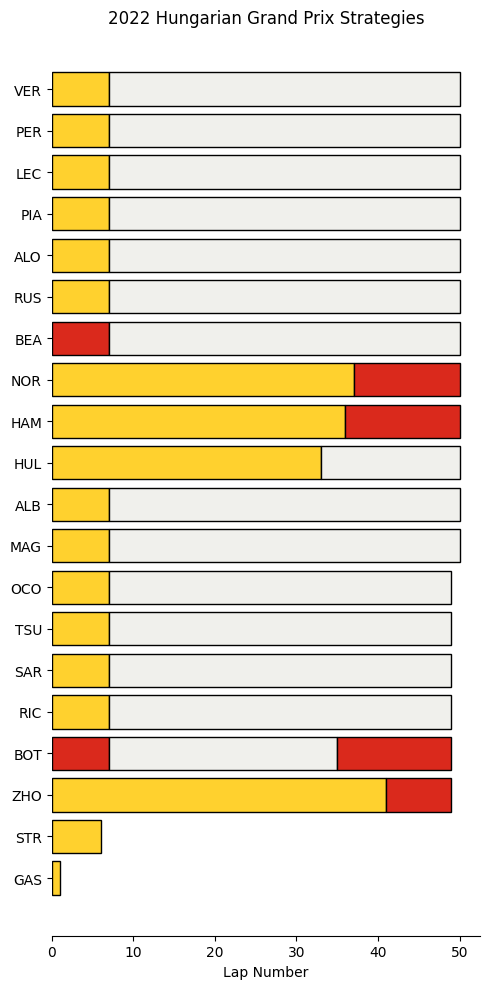

In [12]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Jeddah Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

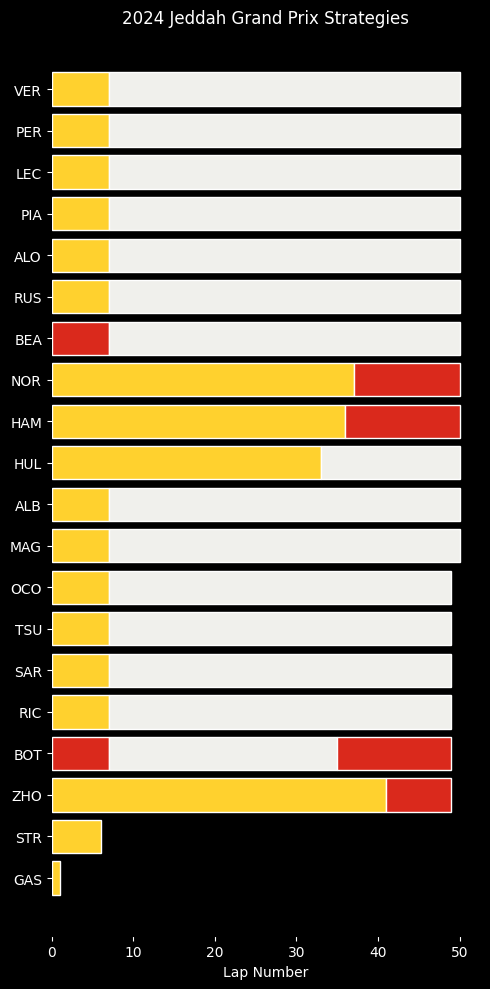

In [13]:
fig, ax = plt.subplots(figsize=(5, 10), facecolor='black')  # Set the figure background to black

# Set the axes background color to black as well
ax.set_facecolor('black')

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="white",  # Change the edgecolor to white for visibility
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Jeddah Grand Prix Strategies", color='white')  # Set title color to white
plt.xlabel("Lap Number", color='white')  # Set xlabel color to white
# Set the color of the tick params to white for visibility
ax.tick_params(colors='white', which='both')

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()